In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [ ]:
df= pd.read_csv(r"/content/DataSetUPML.csv")


In [ ]:
df.head(20)

,measurement_id,id,N_days,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,drug,stage,status
0,1,0,999,59,M,N,N,N,N,2.3,...,3.35,172,1601.0,179.80,63,394,9.7,D-penicillamine,3,D
1,2,1,2574,53,F,N,N,N,N,0.9,...,3.54,63,1440.0,134.85,88,361,11.0,Placebo,3,C
2,3,2,3428,38,F,N,Y,Y,Y,3.3,...,3.55,131,1029.0,119.35,50,199,11.7,Placebo,4,D
3,4,3,2576,51,F,N,N,N,N,0.6,...,3.50,58,1653.0,71.30,96,269,10.7,Placebo,3,C
4,5,4,788,46,F,N,Y,N,N,1.1,...,3.65,63,1181.0,125.55,96,298,10.6,Placebo,4,C
5,6,5,703,53,F,N,Y,N,N,0.6,...,3.46,34,6456.2,60.63,68,213,11.5,D-penicillamine,3,D
6,7,6,1300,49,F,N,N,N,N,1.0,...,3.35,43,1677.0,137.95,90,291,9.8,Placebo,3,C
7,8,7,1615,58,F,N,Y,N,N,0.6,...,3.94,36,598.0,52.70,214,227,9.9,Placebo,3,C
8,9,8,2050,57,F,N,N,N,N,0.7,...,3.65,72,3196.0,94.55,154,269,9.8,D-penicillamine,2,C
9,10,9,2615,41,F,N,N,N,N,0.9,...,3.60,39,1758.0,171.00,140,234,10.6,D-penicillamine,2,C


In [ ]:
# Copy the dataset for preprocessing
df_clean = df.copy()


In [ ]:
# Before encoding and feature selection, check columns
print("Columns in df_clean:", df_clean.columns)

# Check for any NaN values after dropping columns
print("NaN values after cleanup:\n", df_clean.isna().sum())

# Check feature and target shapes
print("Features shape:", X.shape)
print("Target shape:", y.shape)

# Check model accuracy and other metrics (if accuracy is low)
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Columns in df_clean: Index(['measurement_id', 'id', 'N_days', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'drug', 'stage', 'status'],
      dtype='object')
NaN values after cleanup:
 measurement_id    0
id                0
N_days            0
Age               0
Sex               0
Ascites           0
Hepatomegaly      0
Spiders           0
Edema             0
Bilirubin         0
Cholesterol       0
Albumin           0
Copper            0
Alk_Phos          0
SGOT              0
Tryglicerides     0
Platelets         0
Prothrombin       0
drug              0
stage             0
status            0
dtype: int64
Features shape: (7905, 18)
Target shape: (7905,)
Confusion Matrix:
 [[946   5  70]
 [ 13   8  16]
 [126   3 394]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      

In [ ]:
df.isna().sum()

,0
measurement_id,0
id,0
N_days,0
Age,0
Sex,0
Ascites,0
Hepatomegaly,0
Spiders,0
Edema,0
Bilirubin,0


In [ ]:
#check for duplicated
df.duplicated().sum()

0

In [ ]:
df=df.drop(["drugs","id","Ascites","Hepatomegaly", "Spiders", "TEdema"],axis=1)

KeyError: "['drugs', 'TEdema'] not found in axis"

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize dictionary to store label encoders
label_encoders = {}

# Encode categorical variables using LabelEncoder for existing columns
for col in ['drug',  'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))  # Ensure all data is in string format
        label_encoders[col] = le
    else:
        print(f"Skipping encoding for missing column: {col}")



Skipping encoding for missing column: Status


In [ ]:
# Define features and target
X = df_clean.drop(columns=['id'])  # Dropping 'id' and other non-contributing columns
y = df_clean['drug']


In [ ]:
# Encode the 'Sex' column (0 for female, 1 for male)
df_clean['Sex'] = df_clean['Sex'].map({'F': 0, 'M': 1})

# Show the cleaned data
print("Cleaned Data:")
print(df_clean.head())


Cleaned Data:
   measurement_id  id  N_days  Age  Sex  Ascites  Hepatomegaly  Spiders  \
0               1   0     999   59    1        0             0        0   
1               2   1    2574   53    0        0             0        0   
2               3   2    3428   38    0        0             1        1   
3               4   3    2576   51    0        0             0        0   
4               5   4     788   46    0        0             1        0   

   Edema  Bilirubin  ...  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0      0        2.3  ...     3.35     172    1601.0  179.80             63   
1      0        0.9  ...     3.54      63    1440.0  134.85             88   
2      2        3.3  ...     3.55     131    1029.0  119.35             50   
3      0        0.6  ...     3.50      58    1653.0   71.30             96   
4      0        1.1  ...     3.65      63    1181.0  125.55             96   

   Platelets  Prothrombin  drug  stage  status  
0        394     

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Separate categorical and numerical columns
categorical_columns = ['drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
numerical_columns = df_clean.columns.difference(categorical_columns + ['drug'])  # 'Status' is the target

# Encode categorical variables using LabelEncoder
label_encoders = {}
for col in categorical_columns:
    if col in df_clean.columns:  # Ensure the column exists
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))  # Convert to string to avoid issues
        label_encoders[col] = le
    else:
        print(f"Warning: Column '{col}' not found in df_clean.")

# Standardize only numerical features
scaler = StandardScaler()
numerical_columns=['measurement_id', 'id', 'N_days', 'Age', 'Sex', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', ]
df_clean[numerical_columns] = scaler.fit_transform(df_clean[numerical_columns])

# Define features (X) and target (y)
X = df_clean.drop(columns=['drug','stage'])  # Dropping the target column from features
y = df_clean['drug']


Gradient Boosting Model Accuracy: 70.5%


<ipython-input-11-8688d424cdc5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred, palette='viridis')


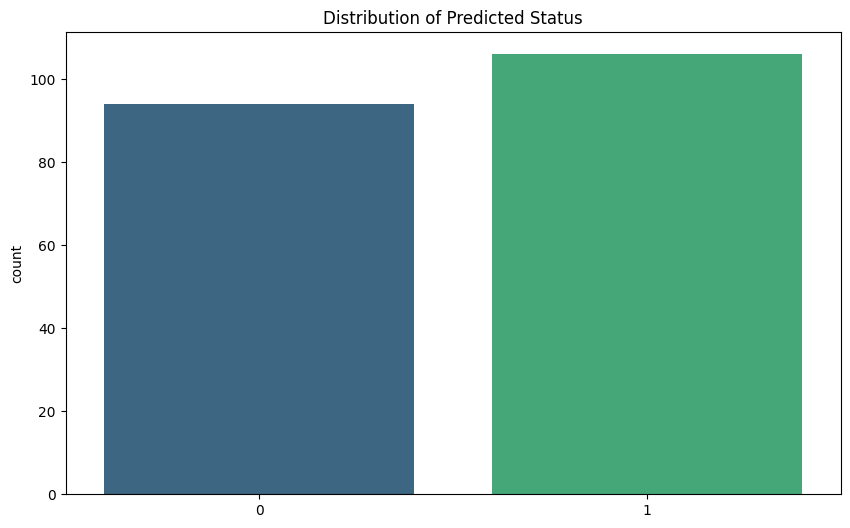

Mean Squared Error: 0.2620046668106775
R-squared: -0.049698184337650275
Drug names in the dataset: ['D-penicillamine' 'Placebo']
The predicted drug for the new patient is: 0.43676948360997947


In [ ]:
# Define features and target
X = df_clean.drop(columns=['measurement_id','id', 'drug', 'status', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])  # Dropping columns that are not used in prediction
y = df_clean['drug']

# Standardize numerical features only for the columns in X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=80)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=20)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy * 100:.1f}%")

# Visualize the classification results
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred, palette='viridis')
plt.title('Distribution of Predicted Status')
plt.show()

# Prepare for regression to predict the best drug
X_reg = df_clean.drop(columns=['measurement_id','id', 'drug', 'status', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'])
y_reg = df_clean['drug']

# Standardize features
X_reg_scaled = scaler.fit_transform(X_reg)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=60)

# Train an SVM model for regression
regression_model = SVR(kernel='linear')
regression_model.fit(X_train_reg, y_train_reg)

# Make predictions on the test set
y_pred_reg = regression_model.predict(X_test_reg)

# Evaluate regression
mse = mean_squared_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Decode the drug names for visualization
unique_drug_indices = df_clean['drug'].unique()
drug_names = label_encoders['drug'].inverse_transform(unique_drug_indices)
print("Drug names in the dataset:", drug_names)

# Define new patient data for prediction, matching only columns in X
new_patient = pd.DataFrame({
    'N_days': [10],          # Example values
    'Age': [45],             # Example values
    'Sex': [1],              # 1 for Male, assuming encoding is consistent
    'Bilirubin': [1.0],      # Example values
    'Cholesterol': [200],    # Example values
    'Albumin': [4.0],        # Example values
    'Copper': [100],         # Example values
    'Alk_Phos': [80],        # Example values
    'SGOT': [20],            # Example values
    'Tryglicerides': [150],  # Example values
    'Platelets': [250],      # Example values
    'Prothrombin': [12.0],   # Example values
    'stage': [1]             # Example stage
})

# Standardize new patient data to match the scaled training features
new_patient_scaled = scaler.transform(new_patient)

# Predict the drug for the new patient using the regression model
predicted_drug = regression_model.predict(new_patient_scaled)
print(f"The predicted drug for the new patient is: {predicted_drug[0]}")


In [ ]:

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)


# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=60)

# Train a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=40)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Model Accuracy: {accuracy * 100:.2f}%")

# To decode the drug names, you can use the label encoder
drug_column = data['Drug']
drug_names = label_encoders['Drug'].inverse_transform(data_clean['Drug'].unique())
print("Drug names in the dataset:", drug_names)


Gradient Boosting Model Accuracy: 85.26%
Drug names in the dataset: ['D-penicillamine' 'Placebo']


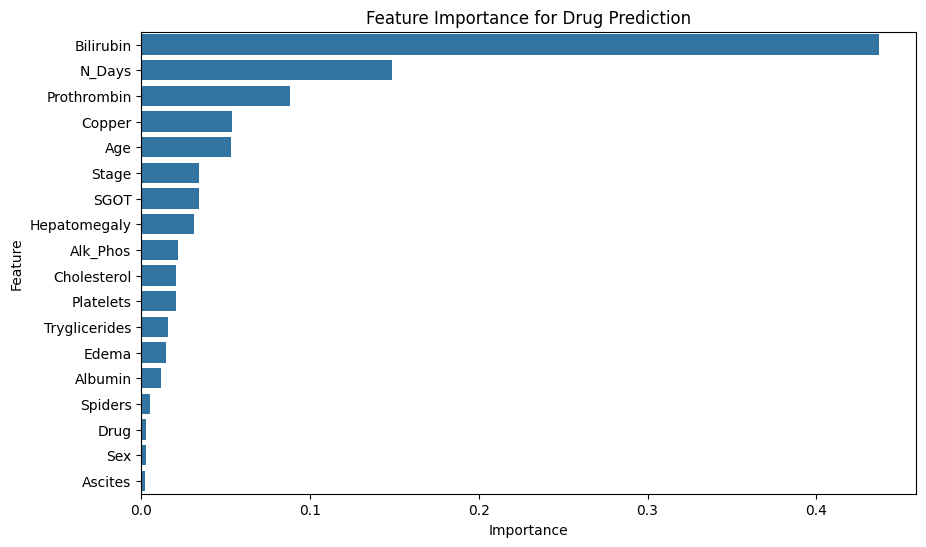

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to hold feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Drug Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


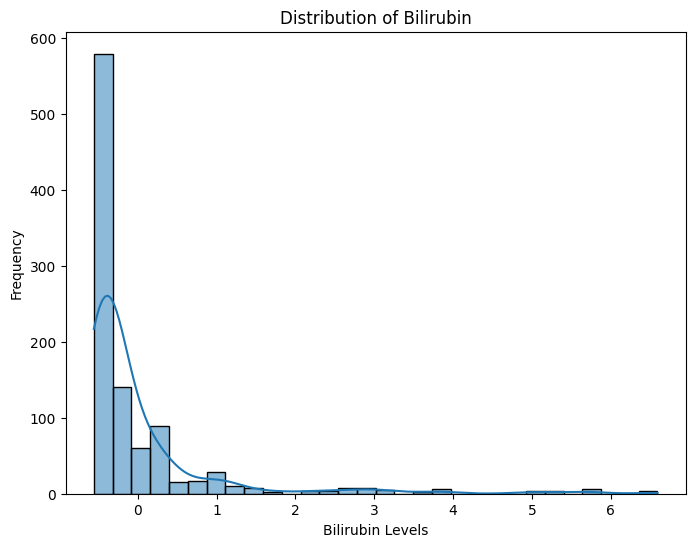

In [ ]:
# Distribution plot for 'Bilirubin'
plt.figure(figsize=(8, 6))
sns.histplot(df_clean['Bilirubin'], bins=30, kde=True)  # Replace 'Bilirubin' with any numerical feature
plt.title('Distribution of Bilirubin')
plt.xlabel('Bilirubin Levels')
plt.ylabel('Frequency')
plt.show()


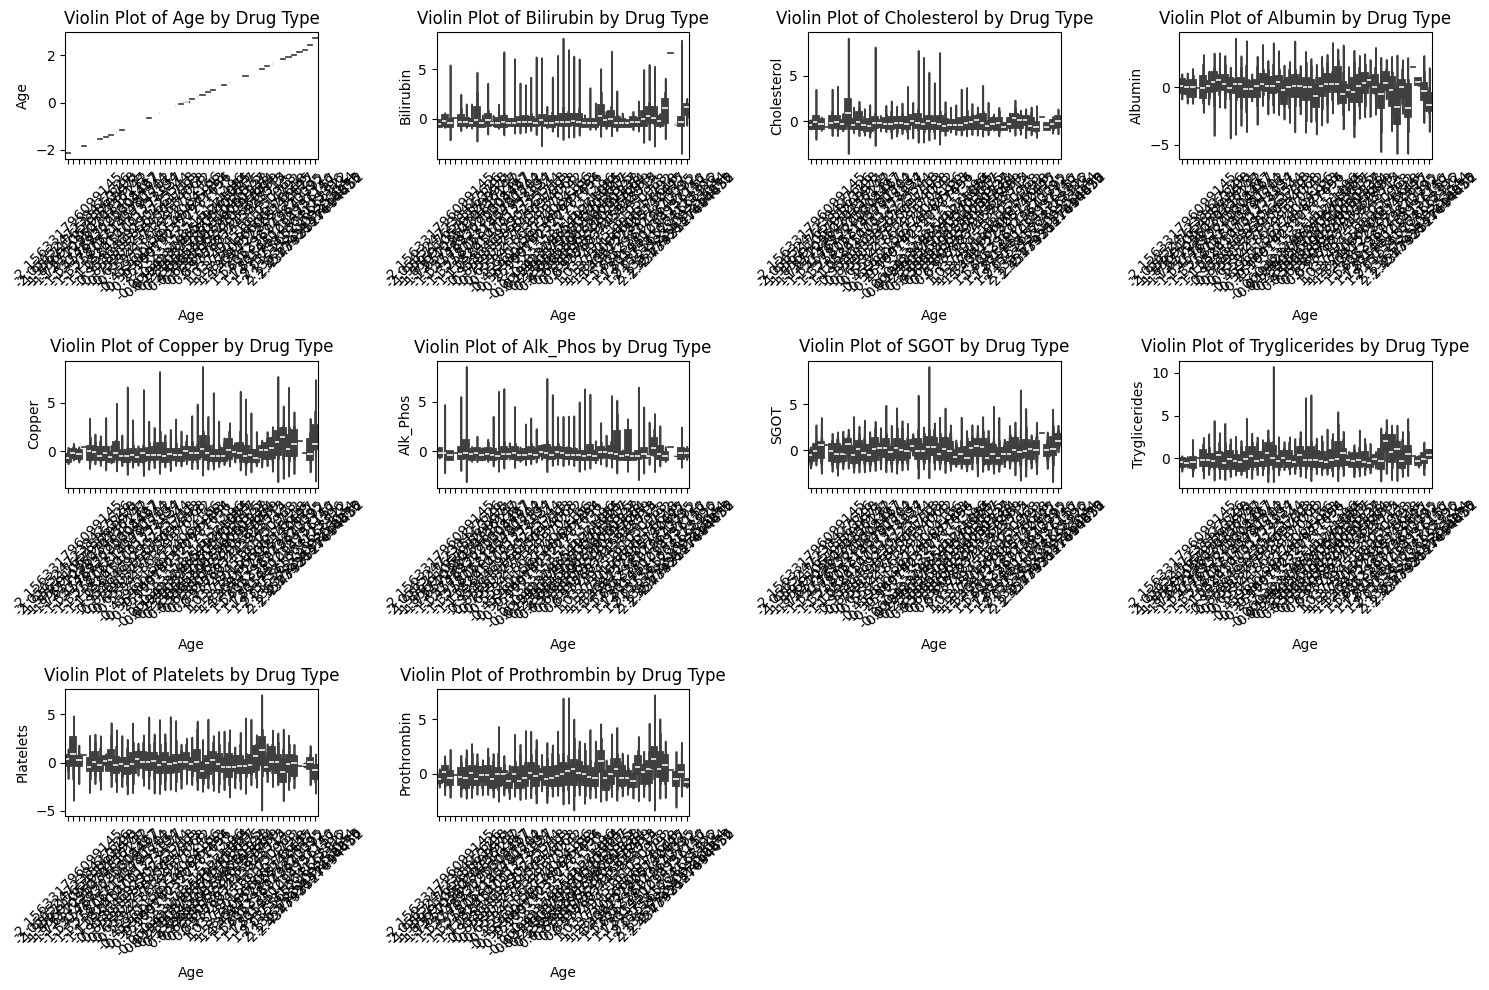

In [ ]:
# Violin plots for numerical features against the categorical 'Drug'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'], 1):
    plt.subplot(3, 4, i)
    sns.violinplot(x='Age', y=feature, data=df_clean)  # Replace 'Drug' with the appropriate target variable
    plt.title(f'Violin Plot of {feature} by Drug Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


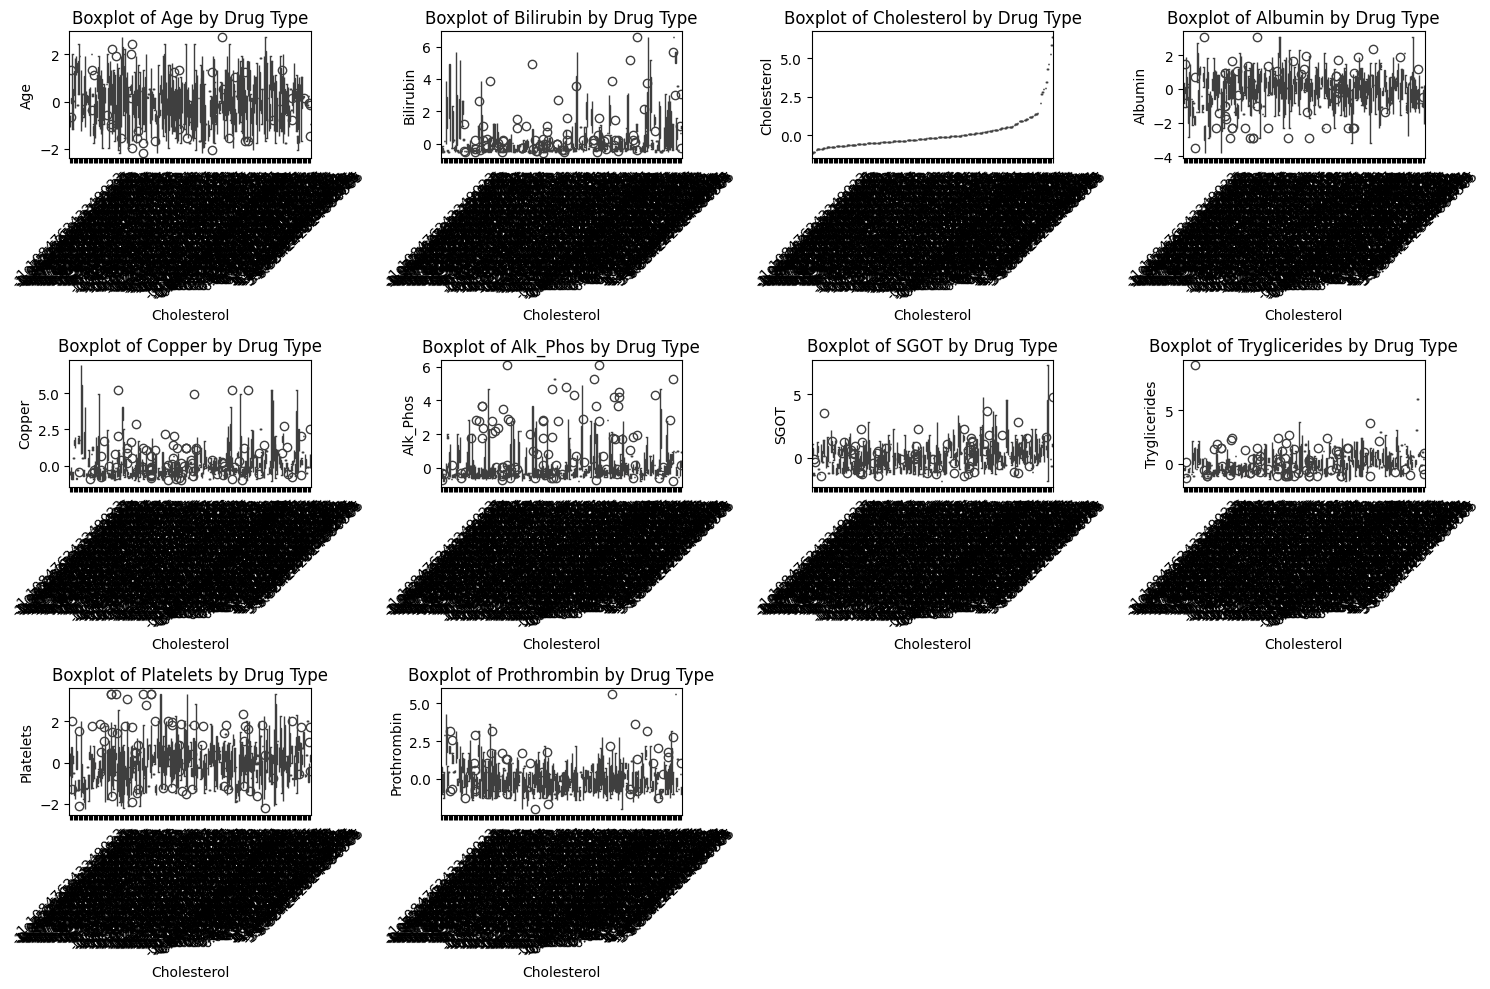

In [ ]:
# Boxplots for numerical features against the categorical 'Drug'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'], 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x='Cholesterol', y=feature, data=df_clean)  # Replace 'Drug' with the appropriate target variable
    plt.title(f'Boxplot of {feature} by Drug Type')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


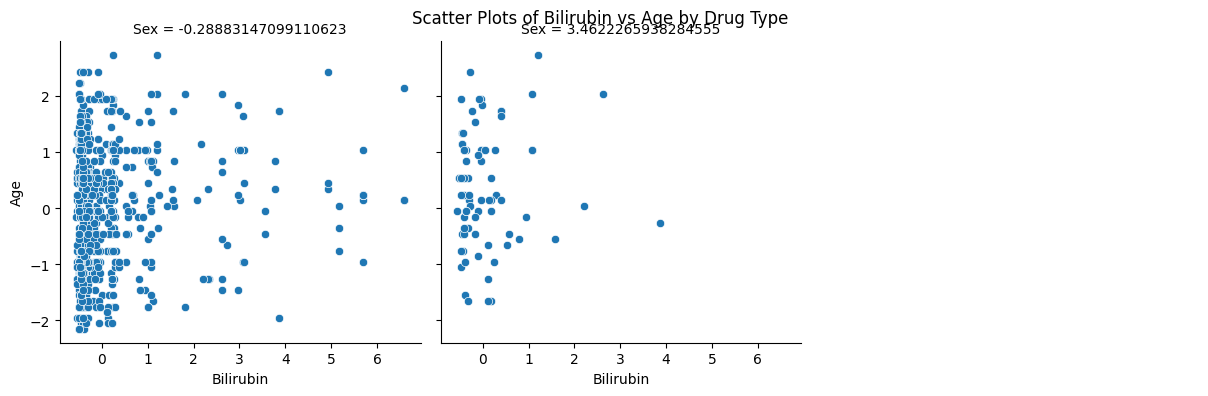

In [ ]:
# Create a FacetGrid to show scatter plots of 'Bilirubin' vs 'Age' for each 'Drug'
g = sns.FacetGrid(df_clean, col='Sex', col_wrap=3, height=4)
g.map(sns.scatterplot, 'Bilirubin', 'Age')  # Adjust feature names as needed
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plots of Bilirubin vs Age by Drug Type')
plt.show()
